In [5]:
from textblob import TextBlob
import  tweepy
import sys

import matplotlib.pyplot as plt

def percentage(part ,whole):
    return 100 * float(part)/float(whole)

<h1> Go to the tweeter developer site and get your API and Tokens so that
    you can have your access to tweeter data which will be used in training your data <h1>

In [2]:
consumer_key = 'xWaBy4T6PoPMPwGcToE8U****'
consumerkey_secret = 'ZEjIDz3MmCBw46dzsQyqMOAZiWNjvOWoKr08kjxtrr92i1****'
access_token = '3226759777-W3ZjS4btcsY0Md0AzntXGwXzBT31o8l5wKv****'
accesstoken_secret = 'IufUiSiN3u00wLYWkyXNDMxSLjbUDIyWX8LYNCsv5*****' 

<h1> this is where you call the tweeter API to get the data and use it in your training <h1>

In [3]:
auth = tweepy.OAuthHandler(consumer_key , consumerkey_secret )
auth.set_access_token(access_token, accesstoken_secret)
api = tweepy.API(auth)

searchWord = input("Enter the keyword to search about : ")
noOfsearchWord = int(input("Enter the no. of tweets to analyze : "))

tweets = tweepy.Cursor(api.search , q = searchWord ).items(noOfsearchWord)

positive = 0
negative = 0
neutral = 0
polarity = 0


for tweet in tweets:
    print(tweet.text)
    print('\n')
    analysis = TextBlob(tweet.text)
    analysis = TextBlob(tweet.text)
 
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0.00):
        neutral += 1 
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1 
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1

        
positive = percentage(positive , noOfsearchWord)
neutral  =  percentage(neutral ,  noOfsearchWord)
negative = percentage(negative ,noOfsearchWord)

positive = format(positive , '.2f')
neutral = format(neutral,'.2f')
negative = format(negative , '.2f')

print("how people are reacting on " + searchWord +" by analyzing " +str(noOfsearchWord)+" tweets" )



if(polarity == 0.00):
        print("neutral") 
elif(polarity < 0.00):
        print("negative")
elif(polarity > 0.00):
        print("positive")         


Enter the keyword to search about : modi
Enter the no. of tweets to analyze : 40
Ajay Devgn thanks PM Modi for his heartfelt note for Veeru Devgan 
 https://t.co/D7Volky3KG

via NaMo App https://t.co/AqOZbJjQx4


मोदी के खिलाफ आग उगलने वाली सोशल मीडिया की तोपें चुनाव नतीजे के बाद से शांत हैं https://t.co/6pGe5HXbqO


RT @ParasharAdarsh1: People call it a Modi wave, waves come and go...This is Modi sea.
#Election2019Results #LokSabha2019 #ModiHaiTohMumkin…


J&amp;K will soon have Hindu CM. Freeze on Delimitation to End. Share of Jammu Seats will increase. Well Done Modi Sark… https://t.co/aXpPpcboyP


RT @RajKSinghIndia: After PM @narendramodi-led NDA's landslide win, several Facebook pages known for their hardcore anti-Modi posts and fal…


@BuchadeA @Mizzling_Gaze Namo modi okkk great


@rahulkanwal @nupur_batra1 Vote Chorwa Hai Lajabab Fakendra Modi


@anonymolu @BajiraoShrimant @asadowaisi That pic of Modi posing with a bow and arrow. Silly Modi 😂


RT @prasannavishy: Several fake 

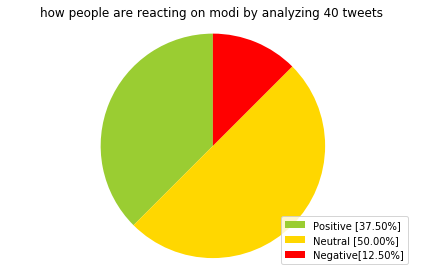

In [4]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]' , 'Negative['+str(negative)+'%]']
sizes = [positive,neutral,negative]
colors = ['yellowgreen','gold','red']
patches, texts = plt.pie(sizes , colors =colors , startangle = 90)
plt.legend(patches,labels, loc = "best")
plt.title("how people are reacting on " + searchWord +" by analyzing " +str(noOfsearchWord)+" tweets" )
plt.axis('equal')
plt.tight_layout()
plt.show()